In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Coverage = pd.read_csv("Output Data/ID_Coverage.csv")
Comparison = pd.read_csv("Output Data/Comparison.csv")

df = Coverage.copy()
df = df[["ID (Dino)", "Missing Time Points"]]
df["Missing Time Points"] = df["Missing Time Points"].apply(
    lambda x: [int(float(i.strip())) for i in x.strip('[]').split(',') if i.strip()] if isinstance(x, str) else ([int(float(x))] if not pd.isnull(x) else []))
df = df.explode("Missing Time Points")
merged = pd.merge(df, Comparison, left_on=["ID (Dino)", "Missing Time Points"], right_on=["ID (Dino)", "t"], how="inner")

In [4]:
merged.to_csv("Output Data/Missing t.csv", index = False)

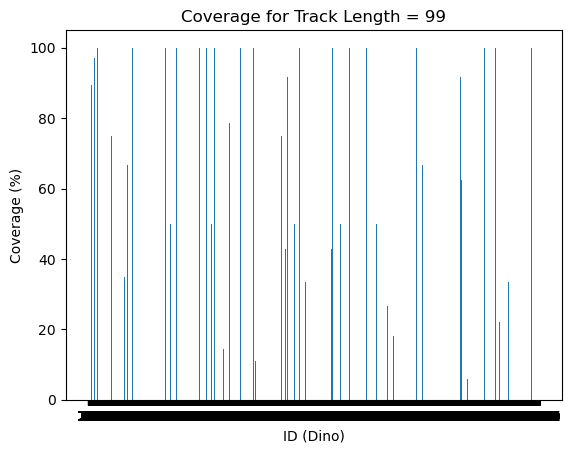

In [30]:
Covera = Coverage
cov = Covera.to_numpy()
plt.bar(cov[:,0].astype(int).astype(str), 100*(cov[:,2]/cov[:,1]), width = 0.5)
plt.xlabel("ID (Dino)")
plt.ylabel("Coverage (%)")
plt.title("Coverage for Track Length = 99")
plt.show()
#plt.savefig("Plots/Coverage TL 99.png")

se 90% eller mer och plotta som funktion av length

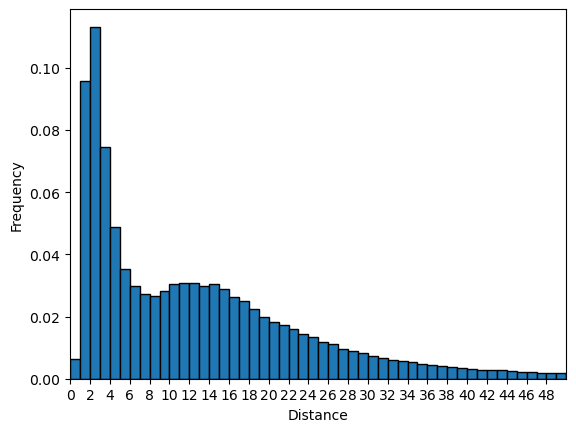

In [6]:
bins = np.arange(0, Comparison["Distance"].max() + 2, 1)
plt.hist(Comparison["Distance"], bins = bins, density=True, edgecolor="black")
plt.xlim(0,50)
plt.xticks(np.arange(0, 50, 2))
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()
#plt.savefig("Plots/Histogram Distance.png")

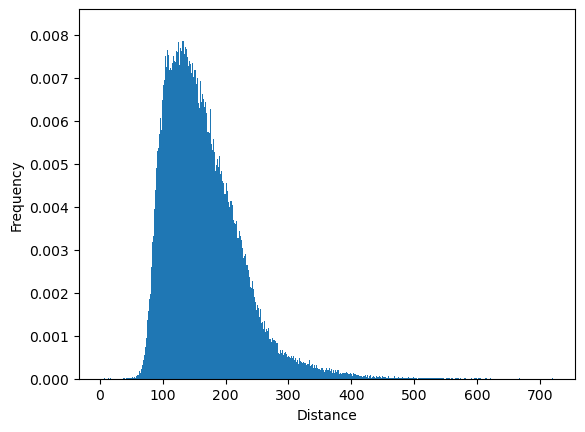

In [7]:
plt.hist(Comparison["FI (Dino)"], bins = round(max(Comparison["FI (Dino)"])), density=True)
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()
#plt.savefig("Plots/Histogram Distance.png")

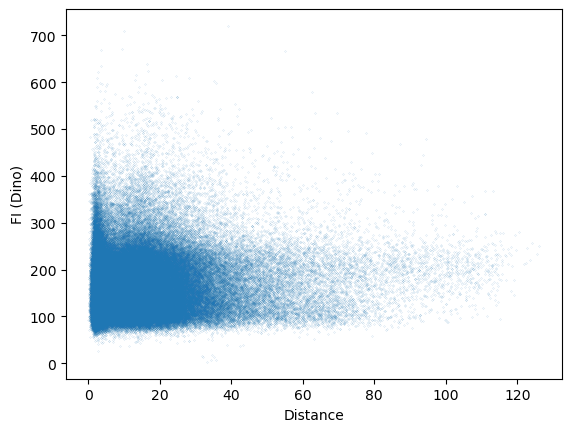

In [26]:
plt.scatter(Comparison["Distance"], Comparison["FI (Dino)"], s = 0.005)
plt.xlabel("Distance")
plt.ylabel("FI (Dino)")
plt.show()
#plt.savefig("Plots/FI CME vs Distance.png")

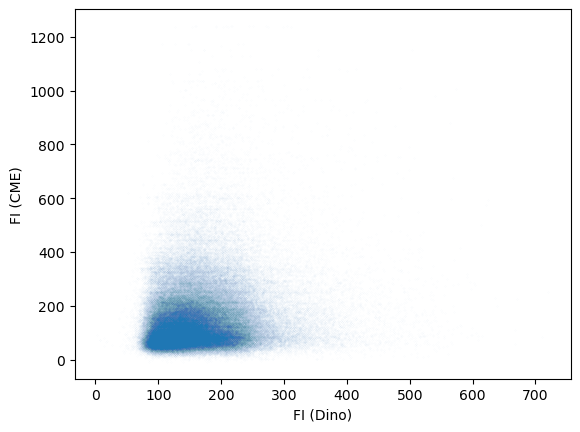

In [9]:
plt.scatter(Comparison["FI (Dino)"], Comparison["FI (CME)"], s = 0.0001)
plt.xlabel("FI (Dino)")
plt.ylabel("FI (CME)")
plt.show()
#plt.savefig("Plots/FI CME vs CI Dino.png")

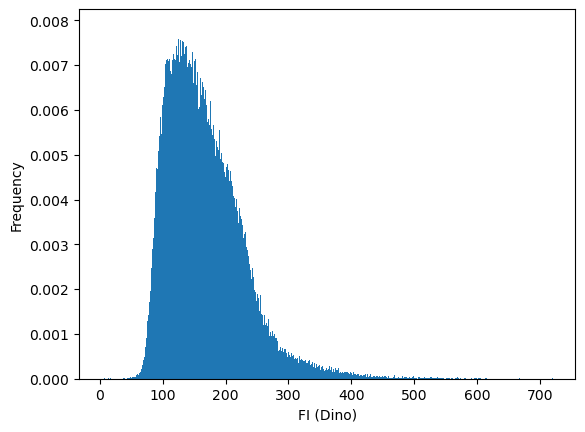

<Figure size 640x480 with 0 Axes>

In [10]:
plt.hist(merged["FI (Dino)"], bins = round(max(merged["FI (Dino)"])), density=True)
plt.xlabel("FI (Dino)")
plt.ylabel("Frequency")
plt.show()
plt.savefig("Plots/Histogram missing t FI CME.png")

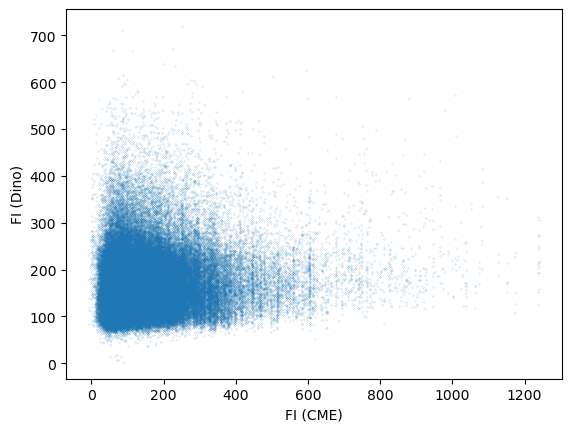

In [11]:
plt.scatter(merged["FI (CME)"], merged["FI (Dino)"], s = 0.01)
plt.xlabel("FI (CME)")
plt.ylabel("FI (Dino)")
plt.show()
#plt.savefig("Plots/FI CME vs CI Dino missing t.png")

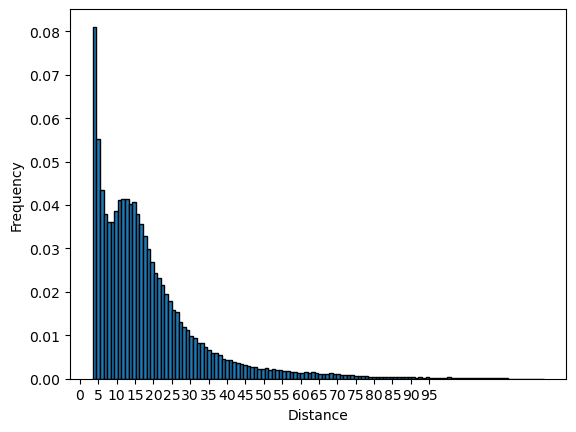

In [12]:
bins = np.arange(0, merged["Distance"].max() + 2, 1)
plt.hist(merged["Distance"], bins = round(max(merged["Distance"])), density=True, edgecolor="black")
plt.xticks(np.arange(0, 100, 5))
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()
#plt.savefig("Plots/Histogram Distance missing t.png")